In [1]:
'''
Old Website -> 1000 visitors, resulting in 50 conversions
New Website -> 500 visitors, resulting in 30 converstions
'''

'\nOld Website -> 1000 visitors, resulting in 50 conversions\nNew Website -> 500 visitors, resulting in 30 converstions\n'

In [2]:
import statsmodels.api as sm
import numpy as np

In [3]:
conversions = np.array([50, 30])
visits = np.array([1000, 500])

In [4]:
z_stat, p_val = sm.stats.proportions_ztest(conversions, visits, alternative = "two-sided")

In [5]:
z_stat

-0.8125338562826986

In [6]:
p_val

0.4164853677823287

In [7]:
# TRY CALCULATING THIS z_stat using the formula as well.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
'''
A french cake shop claims that the average number of pastries they can produce in a day exceeds 500.
The average number of pastries produced per day over a 70 day period was found to be 530.
Assume that the population standard deviation for the pastries produced per day is 125.

Test the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.
'''

'\nA french cake shop claims that the average number of pastries they can produce in a day exceeds 500.\nThe average number of pastries produced per day over a 70 day period was found to be 530.\nAssume that the population standard deviation for the pastries produced per day is 125.\n\nTest the claim using a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05, and state your interpretation.\n'

In [10]:
# STEP 1

'''
H0: average == 500
Ha: average > 500
'''

'\nH0: average == 500\nHa: average > 500\n'

In [11]:
# STEP 2

n = 70
population_sd = 125
population_mean = 500
sample_sd = population_sd / (n ** 0.5)

In [12]:
# STEP 3

'''
Performing a Right Tailed Test.
'''

'\nPerforming a Right Tailed Test.\n'

In [13]:
# STEP 4

z_stat = (530 - population_mean) / sample_sd

In [14]:
z_stat

2.007984063681781

In [15]:
from scipy.stats import norm

In [16]:
p_val = 1 - norm.cdf(z_stat)

In [17]:
p_val

0.022322492581293485

In [20]:
z_critical = norm.ppf(0.95)

In [21]:
z_critical

1.6448536269514722

In [22]:
x = z_critical * sample_sd + population_mean

In [23]:
x

524.574701413748

# T - TEST

In [25]:
'''
Research Scientist testing out a new IQ improvement pill.

Case 1 -> Pill does increase tge IQ
Case 2 -> Pill has no effect on the IQ

Why not a Z - Test?
  - Population SD is unknown in the real world
  - Small sample sizes in case of T test


Average IQ of population -> 100

8 people were given pill -
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]
'''

'\nResearch Scientist testing out a new IQ improvement pill.\n\nCase 1 -> Pill does increase tge IQ\nCase 2 -> Pill has no effect on the IQ\n\nWhy not a Z - Test?\n  - Population SD is unknown in the real world\n  - Small sample sizes in case of T test \n\n\nAverage IQ of population -> 100\n\n8 people were given pill -\niq_scores = [110, 105, 98, 102, 99, 104, 115, 95]\n'

In [26]:
iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]

In [27]:
np.mean(iq_scores)

103.5

In [28]:
# We need very confidence here -> alpha = 0.01

## T - Test has 3 versions ->

1. With 1 sample being compared to a single number
2. With 2 samples which are independent
3. With 2 samples which are dependent

In [29]:
# NOW LETS SOLVE THE PROBLEM ->

iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]
population_mean = 100

In [30]:
# H0: sample_mean == 100 i.e. pill has no effect
# Ha: sample_mean > 100 i.e. pill has a positive effect

In [31]:
x = 103.5

In [32]:
from scipy.stats import ttest_1samp

In [33]:
t_stat, p_val = ttest_1samp(iq_scores, 100)

In [34]:
t_stat

1.5071573172061195

In [35]:
p_val

0.1754994493585011

In [36]:
# Fail to reject the H0, p_val is > alpha i.e. 0.175 > 0.01.

In [37]:
(103.5 - 100) / (np.std(iq_scores) / (8 ** 0.5))

1.611218945415621

In [38]:
# TWO SAMPLE T - TEST

In [39]:
!gdown 1t9LJ6on72_sjHDSQ5I1YN_x6_HR3_roL

Downloading...
From: https://drive.google.com/uc?id=1t9LJ6on72_sjHDSQ5I1YN_x6_HR3_roL
To: /content/iq_two_schools.csv
100% 639/639 [00:00<00:00, 2.21MB/s]


In [40]:
df_iq = pd.read_csv("/content/iq_two_schools.csv")
df_iq.head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [41]:
df_iq.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

1. Option 1
  - H0: mu1 == mu2
  - Ha: mu1 != mu2

2. Option 2
  - H0: mu1 == mu2
  - Ha: mu1 > mu2

3. Option 3
  - H0: mu1 == mu2
  - Ha: mu1 < mu2

In [44]:
iq_1 = df_iq[df_iq["School"] == "school_1"]["iq"]
iq_2 = df_iq[df_iq["School"] == "school_2"]["iq"]

In [46]:
# iq_1, iq_2

In [47]:
from scipy.stats import ttest_ind

In [48]:
# OPTION 1

t_stat, p_val = ttest_ind(iq_1, iq_2)

In [49]:
t_stat, p_val

(-2.4056474861512704, 0.02004552710936217)

In [51]:
# if alpha is 0.05

# H0 is rejected i.e. Ha is true which means mu1 != mu2

In [53]:
# OPTION 2

t_stat, p_val = ttest_ind(iq_1, iq_2, alternative = "greater")
t_stat, p_val

(-2.4056474861512704, 0.9899772364453189)

In [54]:
# if alpha is 0.05

# H0 is accepted

In [55]:
# OPTION 3

t_stat, p_val = ttest_ind(iq_1, iq_2, alternative = "less")
t_stat, p_val

(-2.4056474861512704, 0.010022763554681085)

In [56]:
# if alpha is 0.05

# H0 is rejected i.e. Ha is true which means mu1 < mu2

In [57]:
# CRICKET EXAMPLE

!gdown 1A4rKIs7_ffFSwaBcUoVeCV928J4XIbJj

Downloading...
From: https://drive.google.com/uc?id=1A4rKIs7_ffFSwaBcUoVeCV928J4XIbJj
To: /content/Sachin_ODI.csv
100% 26.4k/26.4k [00:00<00:00, 62.7MB/s]


In [60]:
df = pd.read_csv("/content/Sachin_ODI.csv")

In [61]:
df

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,Australia,Sydney,2012-02-26,Australia,False,False
356,39,0,45,30,5,0,130.00,2,Sri Lanka,Hobart,2012-02-28,India,True,False
357,6,0,25,19,1,0,31.57,1,Sri Lanka,Dhaka,2012-03-13,India,True,False
358,114,0,205,147,12,1,77.55,1,Bangladesh,Dhaka,2012-03-16,Bangladesh,False,True


In [62]:
# BATTING PATTERN IN FIRST / SECOND INNINGS

In [63]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [64]:
'''
H0: average runs in both innings are same i.e. mu1 == mu2
Ha: average runs in innings 1 are more than those in innings 2 i.e. mu1 > mu2
'''

'\nH0: average runs in both innings are same i.e. mu1 == mu2\nHa: average runs in innings 1 are more than those in innings 2 i.e. mu1 > mu2\n'

In [65]:
df_first = df[df["Inns"] == 1]
df_second = df[df["Inns"] == 2]

In [66]:
t_stat, p_val = ttest_ind(
    df_first["runs"],
    df_second["runs"],
    alternative = "greater"
)

In [67]:
t_stat, p_val

(1.4612016295532178, 0.07241862097379981)

In [68]:
# P val == 0.07 > alpha == 0.05

In [69]:
'''
HOMEWORK 1 (Sachin ODI Dataset) ->

Do an analysis on Sachin's batting averages in wins vs losses.
'''

"\nHOMEWORK ->\n\nDo an analysis on Sachin's batting averages in wins vs losses.\n"

In [70]:
'''
HOMEWORK 2 ->

Dataset 1 -> !gdown 15HOYvPFYWF_dAMBMD2EvGG9gyYdAssmm | https://drive.google.com/uc?id=15HOYvPFYWF_dAMBMD2EvGG9gyYdAssmm
Dataset 2 -> !gdown 1IdyZiAAMPKt3bKR2Hx2pIl2cPZG7NZD1 | https://drive.google.com/uc?id=1IdyZiAAMPKt3bKR2Hx2pIl2cPZG7NZD1

Do a comparative analysis on the performance of these two drugs.
'''

'\nHOMEWORK 2 ->\n\nDataset 1 -> !gdown 15HOYvPFYWF_dAMBMD2EvGG9gyYdAssmm | https://drive.google.com/uc?id=15HOYvPFYWF_dAMBMD2EvGG9gyYdAssmm\nDataset 2 -> !gdown 1IdyZiAAMPKt3bKR2Hx2pIl2cPZG7NZD1 | https://drive.google.com/uc?id=1IdyZiAAMPKt3bKR2Hx2pIl2cPZG7NZD1\n\nDo a comparative analysis on the performance of these two drugs.\n'

In [71]:
!gdown 1WQp4Z2Rb3ywHy6XsztFiC27AoYmZpPGT

Downloading...
From: https://drive.google.com/uc?id=1WQp4Z2Rb3ywHy6XsztFiC27AoYmZpPGT
To: /content/aerofit.csv
100% 7.46k/7.46k [00:00<00:00, 18.0MB/s]


In [72]:
df = pd.read_csv("/content/aerofit.csv")

In [73]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<Axes: xlabel='Gender', ylabel='Income'>

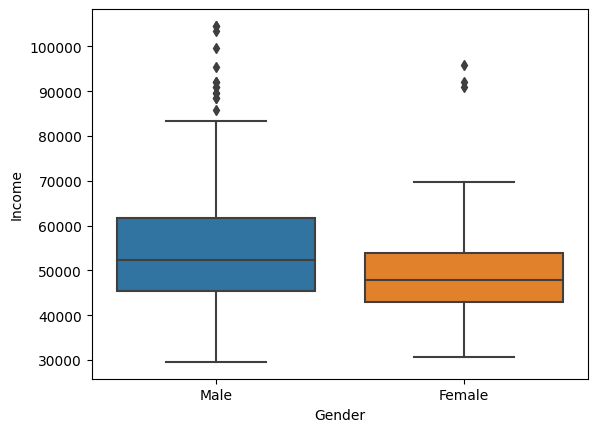

In [74]:
sns.boxplot(x = "Gender", y = "Income", data = df)

In [75]:
'''
H0: salaries are same
Ha: men earn higher
'''

'\nH0: salaries are same\nHa: men earn higher\n'

In [76]:
income_male = df[df["Gender"] == "Male"]["Income"]
income_female = df[df["Gender"] == "Female"]["Income"]

In [77]:
t_stat, p_val = ttest_ind(income_male, income_female, alternative = "greater")

In [78]:
p_val

0.003263631548607129

## ANALYSIS ON T - TEST

- if n > 30 then standard deviation becomes close to standard error and thus z - test and t - test become essentially the same.
- if n is low -> t - test
- if n is high -> either t - test or z - test